# Comparing age sources

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apogee_sample import APOGEESample

In [11]:
sample = APOGEESample.load()
sample()

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,...,FE_O,FE_O_ERR,C_N,C_N_ERR,CN_AGE,CN_LOG_AGE,L23_AGE,L23_AGE_ERR,L23_LOG_AGE,L23_LOG_AGE_ERR
0,2M00000068+5710233,0.002850,57.173164,8.458404,175.658285,-0.040749,282.74594,5031.2637,10.145057,3.456132,...,-0.113698,0.023433,-0.109907,0.024025,7.073880,0.849658,3.713866,1.315107,0.569826,0.138561
1,2M00000133+5721163,0.005558,57.354549,11.953869,153.654715,-0.470835,120.29548,4974.6010,15.310856,2.388251,...,-0.185943,0.039313,-0.312257,0.042614,2.956015,0.470707,NaN,NaN,NaN,NaN
2,2M00000211+6327470,0.008802,63.463078,12.858291,151.396933,0.169356,169.02042,4681.4634,8.766338,2.245527,...,-0.027783,0.016560,-0.526230,0.020749,1.090850,0.037765,NaN,NaN,NaN,NaN
3,2M00000222+5625359,0.009287,56.426662,9.217623,168.311742,-0.185231,129.40749,5049.7686,14.194268,3.291666,...,-0.087976,0.033478,-0.133700,0.032615,6.659762,0.823459,1.241603,0.066435,0.093983,0.031293
4,2M00000446+5854329,0.018603,58.909149,10.505168,160.196856,-0.203834,144.98238,4766.6274,10.474075,2.420902,...,-0.043742,0.020672,-0.310579,0.024317,3.529399,0.547701,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171630,2M23595669+6131251,359.986225,61.523659,9.939371,163.650440,-0.015894,154.12479,5008.3950,13.106046,2.480740,...,0.031660,0.032894,-0.333050,0.034828,2.726533,0.435611,NaN,NaN,NaN,NaN
171631,2M23595676+7918072,359.986523,79.302002,9.415115,168.484293,0.676923,446.47790,4311.3926,6.555767,1.731429,...,-0.287303,0.012854,-0.057909,0.020354,7.646344,0.883454,NaN,NaN,NaN,NaN
171632,2M23595837+5700444,359.993224,57.012356,10.694221,159.021606,-0.358826,101.53675,4954.1700,15.750314,2.474665,...,-0.130718,0.037808,-0.344606,0.040020,2.638397,0.421340,NaN,NaN,NaN,NaN
171633,2M23595886+5726058,359.995265,57.434956,9.328103,167.511337,-0.163006,232.91826,4859.9087,9.050734,2.480687,...,-0.088913,0.019459,-0.262194,0.022607,4.011387,0.603295,NaN,NaN,NaN,NaN


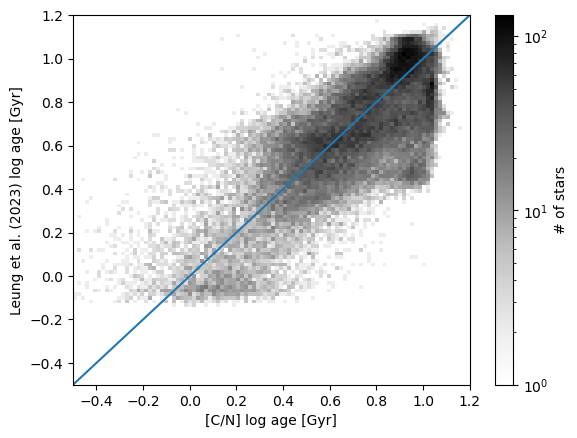

In [33]:
data = sample.data[pd.notna(sample.data['L23_AGE']) & pd.notna(sample.data['CN_AGE'])]

fig, ax = plt.subplots()
h, xedges, yedges, im = ax.hist2d(data['CN_LOG_AGE'], data['L23_LOG_AGE'], range=[[-0.5, 1.2], [-0.5, 1.2]], bins=100, cmap='Greys', norm='log')
fig.colorbar(im, ax=ax, label='# of stars')
ax.plot([-1, 2], [-1, 2])
ax.set_xlabel('[C/N] log age [Gyr]')
ax.set_ylabel('Leung et al. (2023) log age [Gyr]')
# ax.set_xlim((-1, 15))
plt.show()